In [1]:
# import libs
from IPython.display import display
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PowerTransformer
from sklearn.svm import SVC

In [3]:
def plot_heat_map(df):
    plt.figure(figsize=(16, 6))
    heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [4]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [5]:
# import train dataset
df_train = pd.read_csv('train.csv')
df_train.drop('ID', axis='columns', inplace=True)
df_train.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


In [6]:
# import test dataset
df_test = pd.read_csv('test.csv')
df_test.head(5)

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803


In [7]:
columns_need_to_be_scaled = df_train.drop(columns=['y']).columns
test_columns_need_to_be_scaled = df_test.drop(columns=['ID']).columns

SS = StandardScaler().fit(df_train[columns_need_to_be_scaled])
df_train[columns_need_to_be_scaled] = pd.DataFrame(SS.transform(df_train[columns_need_to_be_scaled]), columns=columns_need_to_be_scaled)
df_test[test_columns_need_to_be_scaled] = pd.DataFrame(SS.transform(df_test[test_columns_need_to_be_scaled]), columns=test_columns_need_to_be_scaled)
df_train

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0.174073,0.539713,0.897727,-0.342811,2.224308,1.440028,0.172036,0.322783,-2.966134,0.068758,-1.650182,-1.873127,0.231513,-1.328445,-1.772230,0.815760,HOROZ
1,-0.290465,-0.454337,-0.633401,0.256188,-1.391835,-1.729039,-0.301224,-0.253265,0.445540,1.498190,1.701569,1.570313,-0.526343,1.109856,1.621877,0.531237,SEKER
2,-0.725552,-0.937254,-0.932247,-0.753434,-0.642144,-0.420342,-0.726114,-0.880726,1.051566,0.267127,0.964020,0.599206,0.902962,0.970037,0.573092,0.616586,DERMASON
3,-0.484668,-0.564026,-0.600178,-0.406731,-0.502811,-0.247737,-0.486967,-0.520301,0.330964,0.406669,0.518910,0.448979,0.322302,0.483610,0.417275,0.967898,DERMASON
4,-0.357659,-0.371530,-0.451657,-0.203349,-0.515832,-0.263202,-0.359627,-0.343598,-0.411095,0.275515,0.256953,0.445159,0.046731,0.328421,0.413335,0.330810,SIRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10829,-0.518553,-0.647814,-0.812743,-0.215161,-1.158653,-1.233962,-0.521436,-0.568874,0.420498,0.529325,0.881949,1.247915,0.055872,1.171445,1.265712,0.609747,SEKER
10830,-0.707781,-0.872885,-0.840616,-0.811837,-0.355019,-0.080984,-0.707846,-0.852831,-0.370439,0.156751,0.569914,0.273955,1.010442,0.671241,0.237909,0.595313,DERMASON
10831,0.972924,1.119457,1.323931,0.867104,0.879797,0.875756,0.957980,1.172360,0.450680,0.899956,-0.293572,-0.917823,-1.116522,-1.205589,-0.921288,-0.155804,CALI
10832,-0.165318,-0.134490,-0.120951,-0.069262,-0.112764,0.161455,-0.167983,-0.090236,-1.490112,0.273468,0.228492,-0.001391,-0.121563,-0.157706,-0.039535,-0.067361,SIRA


In [8]:
X = df_train[columns_need_to_be_scaled].drop(columns=['ConvexArea', 'Eccentricity', 'Compactness',
                                                      'Area', 'Perimeter', 'EquivDiameter', 
                                                      'MinorAxisLength', 'ShapeFactor2'])
y = df_train['y']

df_test = df_test.drop(columns=['ConvexArea', 'Eccentricity', 'Compactness',
                                'Area', 'Perimeter', 'EquivDiameter', 
                                'MinorAxisLength', 'ShapeFactor2'])

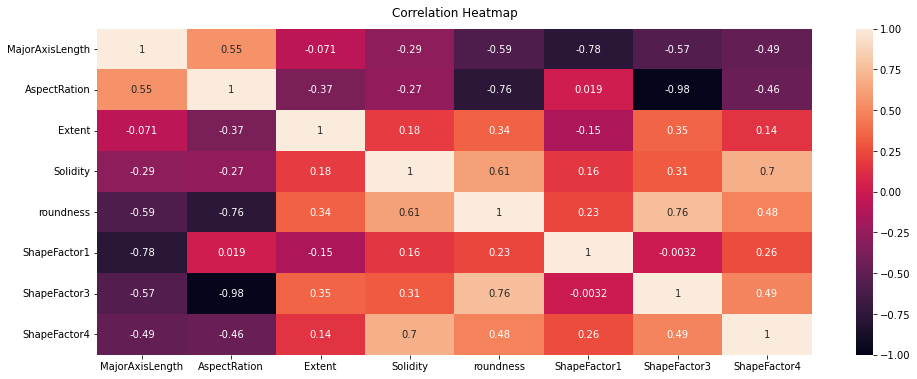

In [9]:
plot_heat_map(X)

In [10]:
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                  y,
                                                  test_size=0.2,
                                                  stratify = y,
                                                  random_state = SEED)

In [11]:
svc = SVC(random_state=SEED, gamma=0.28, probability=True)
svc.fit(X, y)
# print('Full_columns_accuracy_train: %f'%(svc.score(X_train, y_train)))
# print('Full_columns_accuracy_val: %f'%(svc.score(X_test, y_test)))
# print('===========================')

# from sklearn.metrics import classification_report

# predictions = svc.predict(X_test)
# pd.DataFrame(classification_report(y_test, predictions, output_dict=True))

SVC(gamma=0.28, probability=True, random_state=42)

In [12]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=SEED, activation='relu', max_iter=500, early_stopping=True)
mlp.fit(X, y)
# print('Full_columns_accuracy_train: %f'%(mlp.score(X_train, y_train)))
# print('Full_columns_accuracy_val: %f'%(mlp.score(X_test, y_test)))
# print('===========================')

# from sklearn.metrics import classification_report

# predictions = mlp.predict(X_test)
# pd.DataFrame(classification_report(y_test, predictions, output_dict=True))

MLPClassifier(early_stopping=True, max_iter=500, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=SEED, 
                            min_samples_leaf=10, 
                            max_features=0.15, 
                            n_estimators=300)
rf.fit(X, y)
# print('Full_columns_accuracy_train: %f'%(rf.score(X_train, y_train)))
# print('Full_columns_accuracy_val: %f'%(rf.score(X_test, y_test)))
# print('===========================')

# from sklearn.metrics import classification_report

# predictions = rf.predict(X_test)
# pd.DataFrame(classification_report(y_test, predictions, output_dict=True))

RandomForestClassifier(max_features=0.15, min_samples_leaf=10, n_estimators=300,
                       random_state=42)

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

dt = DecisionTreeClassifier(random_state=SEED, min_samples_leaf=10)

bg = BaggingClassifier(base_estimator=dt, 
                       verbose=False, 
                       n_estimators=300, 
                       random_state=SEED)

bg.fit(X, y)
# print('Full_columns_accuracy_train: %f'%(bg.score(X_train, y_train)))
# print('Full_columns_accuracy_val: %f'%(bg.score(X_test, y_test)))
# print('===========================')

# from sklearn.metrics import classification_report

# predictions = bg.predict(X_test)
# pd.DataFrame(classification_report(y_test, predictions, output_dict=True))


BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=10,
                                                        random_state=42),
                  n_estimators=300, random_state=42, verbose=False)

In [15]:
# VotingClassifier
classifiers = [('SVC', svc),
               ('MLP Classifier', mlp), 
               ('RandomForest Classifier', rf), 
               ('Bagging Classifier for dt Classifier', bg)]

from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=classifiers)   
vc.fit(X, y)
# print('Full_columns_accuracy_train: %f'%(vc.score(X_train, y_train)))
# print('Full_columns_accuracy_val: %f'%(vc.score(X_test, y_test)))
# print('===========================')

# from sklearn.metrics import classification_report

# predictions = vc.predict(X_test)
# pd.DataFrame(classification_report(y_test, predictions, output_dict=True))

VotingClassifier(estimators=[('SVC',
                              SVC(gamma=0.28, probability=True,
                                  random_state=42)),
                             ('MLP Classifier',
                              MLPClassifier(early_stopping=True, max_iter=500,
                                            random_state=42)),
                             ('RandomForest Classifier',
                              RandomForestClassifier(max_features=0.15,
                                                     min_samples_leaf=10,
                                                     n_estimators=300,
                                                     random_state=42)),
                             ('Bagging Classifier for dt Classifier',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=10,
                                                                                      random_state=42),
                             

In [16]:
y_pred = vc.predict(df_test.drop(columns='ID'))
df_test['y'] = y_pred

In [17]:
df_test.columns

Index(['ID', 'MajorAxisLength', 'AspectRation', 'Extent', 'Solidity',
       'roundness', 'ShapeFactor1', 'ShapeFactor3', 'ShapeFactor4', 'y'],
      dtype='object')

In [18]:
df_test[['ID', 'y']]

,ID,y
0,10834,HOROZ
1,10835,DERMASON
2,10836,BARBUNYA
3,10837,DERMASON
4,10838,BOMBAY
...,...,...
2704,13538,CALI
2705,13539,SEKER
2706,13540,HOROZ
2707,13541,DERMASON


In [19]:
df_test[['ID', 'y']].to_csv('submission.csv', index=False)